In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import random
import rasterio
from rasterio.plot import show

In [2]:
# !pip install rasterio

In [2]:
# Load some sample image paths
data_dir = "/scratch/pawsey1157/rtrivedi/dataset/Phenotypes/Multispec"

multi = glob(f"{data_dir}/*")
# possible types (GNDVI, NDRE, NDVI, NIR, R, RE, B, G)
#MULTI = glob(f"{data_dir}/Or_crop/*")

In [3]:
multi[0]

'/scratch/pawsey1157/rtrivedi/dataset/Phenotypes/Multispec/18-OBR-YTBW-B5I-30602-20180321_203302_IMG_0965_1.tif'

# Explore image properties
Rasterio, PIL and cv2 show the same array values

In [4]:
# How many images we have?
multi = glob(f"{data_dir}/*")
#multi = glob(f"{data_dir}/Or_crop/*")
print(len(multi))

167609


In [5]:
#NDVI = [im for im in multi if "_NDVI" in im]
# Select unique images if possible
#selected_images = random.sample(NDVI, min(9, len(multi)))  # Avoid exceeding available images
selected_images = random.sample(multi, min(9, len(multi)))

In [7]:
#with rasterio.open(multi[0]) as src:
#    print("Band count:", src.count)
#    print("Descriptions:", src.descriptions)
#    print("Indexes:", src.indexes)

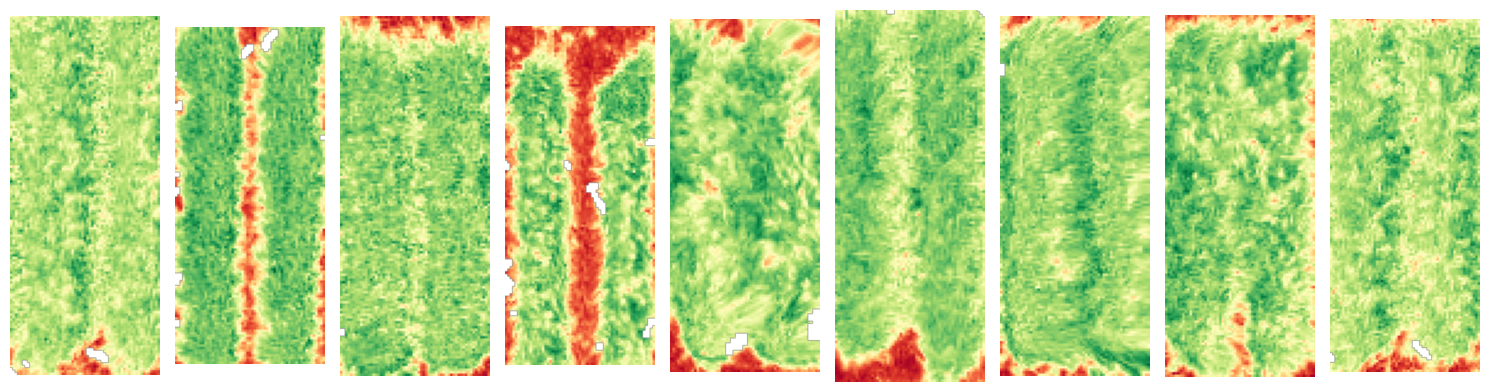

In [6]:
## Create subplots
#fig, ax = plt.subplots(1, 9, figsize=(10, 10))
#ax = ax.ravel()  # Flatten the 3x3 grid to a 1D array
#for i, img_path in enumerate(selected_images):
#    im = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
#    ax[i].imshow(im, cmap='inferno', vmin=0.6)  # Use cmap if grayscale
#    # ax[i].set_title(os.path.basename(img_path))
#    ax[i].axis('off')  # Hide axes
#
#plt.tight_layout()
#plt.show()

# Visualize computed NDVI
fig, ax = plt.subplots(1, len(selected_images), figsize=(15, 5))
ax = ax.ravel()

for i, path in enumerate(selected_images):

    with rasterio.open(path) as src:

        image = src.read()

        # Read specific bands 
        red = src.read(3).astype(float)   # Band 3 is Red
        nir = src.read(5).astype(float)   # Band 5 is NIR

        # Avoid divide-by-zero errors
        np.seterr(divide='ignore', invalid='ignore')
        ndvi = (nir - red) / (nir + red)
        ndvi = np.clip(ndvi, -1, 1)  # NDVI ranges from -1 to 1

        ax[i].imshow(ndvi, cmap='RdYlGn')
        ax[i].axis('off')

plt.tight_layout()
plt.show()

In [33]:
#plt.hist(im)

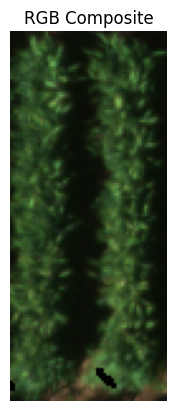

In [7]:
#R = cv2.imread(img_path.replace("NDVI", "R"), cv2.IMREAD_UNCHANGED)
#G = cv2.imread(img_path.replace("NDVI", "G"), cv2.IMREAD_UNCHANGED)
#B = cv2.imread(img_path.replace("NDVI", "B"), cv2.IMREAD_UNCHANGED)

R = image[2, :, :]
G = image[1, :, :]
B = image[0, :, :]
RGB = np.dstack((R, G, B)).astype(np.float32) / 16383.0

plt.imshow(np.clip(RGB, 0, 1))
plt.title("RGB Composite")
plt.axis('off')
plt.show()

In [8]:
R.dtype

dtype('uint16')

(array([[ 20.,  67.,  39.,   9.,   8.,   3.,   0.,   0.,   0.,   0.],
        [ 12.,  54.,  46.,  21.,  13.,   0.,   0.,   0.,   0.,   0.],
        [  6.,  42.,  48.,  31.,  17.,   1.,   1.,   0.,   0.,   0.],
        [  6.,  22.,  52.,  41.,  21.,   4.,   0.,   0.,   0.,   0.],
        [  6.,  11.,  50.,  54.,  17.,   8.,   0.,   0.,   0.,   0.],
        [  4.,   5.,  36.,  75.,  19.,   6.,   1.,   0.,   0.,   0.],
        [  0.,   7.,  29.,  84.,  24.,   0.,   2.,   0.,   0.,   0.],
        [  0.,   2.,  34.,  69.,  31.,  10.,   0.,   0.,   0.,   0.],
        [  0.,   3.,  40.,  65.,  27.,   6.,   5.,   0.,   0.,   0.],
        [  0.,   3.,  64.,  46.,  21.,  10.,   2.,   0.,   0.,   0.],
        [  0.,  11.,  70.,  41.,  19.,   4.,   1.,   0.,   0.,   0.],
        [  0.,  14.,  71.,  48.,  12.,   1.,   0.,   0.,   0.,   0.],
        [  0.,  12.,  71.,  47.,  11.,   3.,   1.,   1.,   0.,   0.],
        [  0.,  10.,  70.,  53.,  12.,   0.,   1.,   0.,   0.,   0.],
        [  0.,  18.,

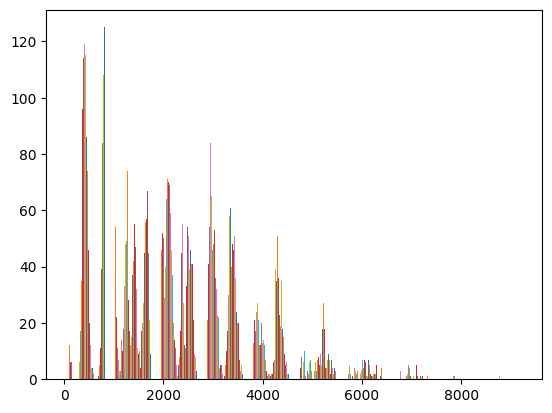

In [8]:
plt.hist(R)

In [9]:
RGB = np.dstack((R, G, B))
print(RGB.max())
(RGB.astype(np.float32) / 16383.0).max()

11030


0.67325884

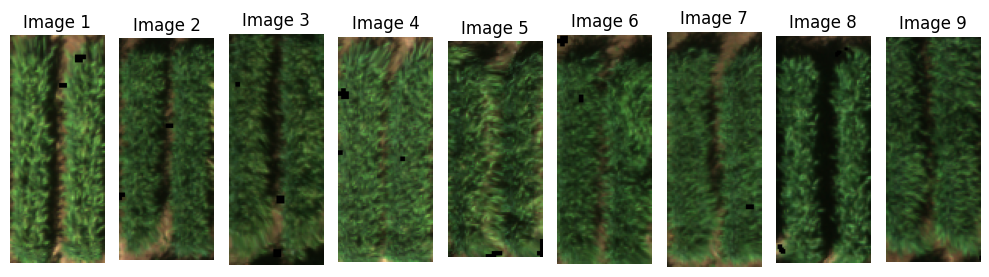

In [10]:
#NDVI = [im for im in multi if "_NDVI" in im]
# Select unique images if possible
#selected_images = random.sample(NDVI, min(9, len(NDVI)))  # Avoid exceeding available images

selected_images = random.sample(multi, min(9, len(multi)))

# RGB
fig, ax = plt.subplots(1, 9, figsize=(10, 10))
ax = ax.ravel()  # Flatten the 3x3 grid to a 1D array


for i, img_path in enumerate(selected_images):
    # Load each band
#    R = cv2.imread(img_path.replace("NDVI", "R"), cv2.IMREAD_UNCHANGED)
#    G = cv2.imread(img_path.replace("NDVI", "G"), cv2.IMREAD_UNCHANGED)
#    B = cv2.imread(img_path.replace("NDVI", "B"), cv2.IMREAD_UNCHANGED)

    with rasterio.open(img_path) as src:

        image = src.read()

        R = image[2, :, :]
        G = image[1, :, :]
        B = image[0, :, :]

        # Stack into an RGB image
        RGB = np.dstack((R, G, B))
        # Normalize to 0-1 range - assuming the images sit at 14-bit
        RGB = RGB.astype(np.float32) / 16383.0
        # Plot
        ax[i].imshow(RGB)
        ax[i].set_title(f"Image {i+1}")
        ax[i].axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [12]:
# Check Image range of multiple images to know if they are 14, 16 or 32 bits
print("_NIR.")
BAND = [path for path in MULTI if "_NIR" in path]
BAND = random.sample(BAND, min(20, len(NIR)))

for i in BAND:
    im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    print(im.max(), i)

print("_RE.")
BAND = [path for path in MULTI if "_RE." in path]
BAND = random.sample(BAND, min(20, len(NIR)))

for i in BAND:
    im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    print(im.max(), i)

print("_R.")
BAND = [path for path in MULTI if "_R." in path]
BAND = random.sample(BAND, min(20, len(NIR)))

for i in BAND:
    im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    print(im.max(), i) 

print("_NDVI.")
BAND = [path for path in MULTI if "_NDVI." in path]
BAND = random.sample(BAND, min(20, len(NIR)))

for i in BAND:
    im = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    print(im.max(), i)



_NIR.


NameError: name 'MULTI' is not defined

# Process images

- stack im layers to alignment
- normalise pixel values
- resize image
- data augmentation

The first step is to identify the plot unique ids, which should match with the hybrid later.

We will stack the image bands (NDVI, R, B, G...) captured on the same plot/day. 

These will be fed to the ML model as a single block.

In [13]:
NIR = [path for path in MULTI if "NIR" in path]
NIR = NIR[:20]

for im in NIR:
    im = cv2.imread(im, cv2.IMREAD_UNCHANGED)
    print(im.max())

NameError: name 'MULTI' is not defined

['/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-3014-20180122_220853_IMG_0259_NIR.tif',
 '/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-2317-20180122_215459_IMG_0609_NIR.tif',
 '/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-3405-20180122_214414_IMG_0106_NIR.tif',
 '/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-1428-20180122_220723_IMG_0190_NIR.tif',
 '/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-1677-20180122_220329_IMG_0022_NIR.tif',
 '/software/projects/pawsey1157/modanilevicz/setonix/scripts/image_dataset/18MX_EYT_FLAT_RE_30m_20180119/Or_crop/18-OBR-EYTBW-F5I-943-20180122_215004_

In [11]:
from glob import glob

In [12]:
def find_unique_multi(folderpath):
    # Generate a list of files in the folder
    im_list = glob(f"{folderpath}/*tif")
    # Extract the beginning of the filename
    im_list = [filename[:filename.rfind("_")] for filename in im_list]
    # Remove repeated file names 
    im_list = list(set(im_list))
    return im_list

def stack_image_bands(image_root):
    bandnames = ["GNDVI", "NDRE", "NDVI", "NIR", "R", "RE", "B", "G"]
    band_dict = {}
    for b in bandnames:
        im_path = image_root + "_" + b + ".tif" 
        band_dict[b] = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
        if b in ["NIR", "R", "RE", "B", "G"]:
            # Normalize to 0-1 range - assuming the images sit at 14-bit
            # The VIs are already normalised to 0-1 range
            band_dict[b] = band_dict.astype(np.float32) / 16383.0
    # stack them
    stacked = np.dstack((band_dict["R"],
                         band_dict["G"],
                         band_dict["B"],
                         band_dict["NIR"],
                         band_dict["RE"],
                         band_dict["NDVI"],
                         band_dict["NDRE"],
                         band_dict["GNDVI"]))
        

In [13]:
def read_and_process_multispec_image(filepath):
    with rasterio.open(filepath) as src:
        image = src.read().astype(np.float32)  # shape: (bands, height, width)

    # Normalize assuming 14-bit images (range 0–16383)
    image /= 16383.0

    # Assign bands (convert from (bands, H, W) to individual HxW bands)
    B   = image[0]
    G   = image[1]
    R   = image[2]
    RE  = image[3]
    NIR = image[4]

    # Compute vegetation indices
    NDVI  = (NIR - R) / (NIR + R + 1e-6)
    NDRE  = (NIR - RE) / (NIR + RE + 1e-6)
    GNDVI = (NIR - G) / (NIR + G + 1e-6)

    # Stack all 8 bands
    stacked = np.dstack((R, G, B, NIR, RE, NDVI, NDRE, GNDVI))  # shape: (H, W, 8)
    return stacked

Stacked shape: (137, 61, 8)


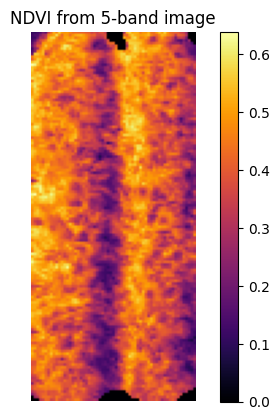

In [14]:
path = "/scratch/pawsey1157/rtrivedi/dataset/Phenotypes/Multispec/18-OBR-YTBW-B5I-4354-20180319_200334_IMG_0770_1.tif"
stacked_img = read_and_process_multispec_image(path)
print("Stacked shape:", stacked_img.shape)

# Visualize NDVI
plt.imshow(stacked_img[:, :, 5], cmap='inferno')  # NDVI
plt.colorbar()
plt.title("NDVI from 5-band image")
plt.axis('off')
plt.show()

In [15]:
target_size = (61, 145)  # (width, height)

def resize_multiband(img, target_size):
    bands = []
    for i in range(img.shape[2]):  # loop over bands (8)
        band_resized = cv2.resize(img[:, :, i], target_size, interpolation=cv2.INTER_AREA)
        bands.append(band_resized)
    return np.stack(bands, axis=-1)

output_dir = "/scratch/pawsey1157/rtrivedi/dataset/Phenotypes/stacked_npy"
os.makedirs(output_dir, exist_ok=True)

# Find all multispectral images
multi_images = glob(f"{data_dir}/*.tif")

# Loop through each image
for image_path in multi_images:
    stacked_img = read_and_process_multispec_image(image_path)
    img_resized = resize_multiband(stacked_img, target_size)
    basename = os.path.basename(image_path).replace(".tif", ".npy")
    np.save(os.path.join(output_dir, basename), img_resized)

In [16]:
os.path.basename(multi[0])

'18-OBR-YTBW-B5I-30602-20180321_203302_IMG_0965_1.tif'

In [17]:
# Check the plot/hybrid ID - otherwise not sure how to match images across
[im for im in multi if '18-OBR-YTBW-B5I-4918' in im]

['/scratch/pawsey1157/rtrivedi/dataset/Phenotypes/Multispec/18-OBR-YTBW-B5I-4918-20180319_200425_IMG_0812_1.tif']

In [ ]:
# Match 

In [ ]:
# Export them as numpy arrays - for easier modelling :)